In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy import stats

# Cofiguraciones
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

# Lectura de los datos

In [8]:
vehiculos = pd.read_pickle("./Data/vehiculos_variables_agrupadas.pkl")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,transmision_tipo,traccion_tipo,clase_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Automatica,dos,Vehículo Especial,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,dos,Vehículo Especial,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Automatica,dos,Vehículo Especial,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatica,dos,Vehículo Especial,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Automatica,dos,Coche Mediano,Premium,grande,alto,alto,0.236588


In [9]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
transmision_tipo        category
traccion_tipo           category
clase_tipo              category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

# Distribución de variables numéricas

Podemos usar histogramas/diagrama de barras para ver la distribución de una variable

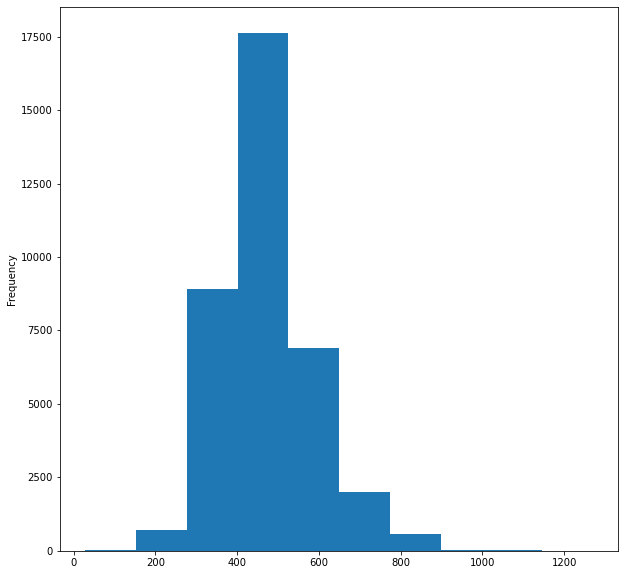

In [10]:
vehiculos["co2"].plot.hist()

También podemos usar un diagrama KDE para ver la función estimada de la distribución de una variable

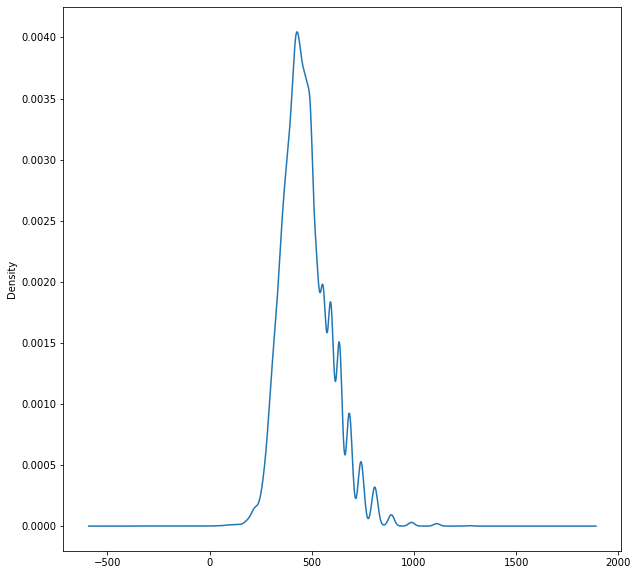

In [11]:
vehiculos["co2"].plot.kde()

Para poder analizar la distribución de las variables numéricas de una forma más sencilla pordemos usar la librería ipywidgets, para ello tenemos que definir una función que dibuje el kde/histograma de una forma genérica y pasarle las series de la columnas que queremos analizar.

In [25]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel("Distribución de la variable {}".format(col))
    plt.show()

In [26]:
columnas_numericas = vehiculos.select_dtypes(["int", "float"]).columns

In [32]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

<function __main__.distribucion_variable_numerica(df, col)>

A excepción de la variable cilindros, el resto parece seguir una distribucón normal. Para ver si sigue una distribución normal podemos realizar un gráfico de probabilidades.

In [33]:
def normalidad_variable_numerica(col):
    stats.probplot(vehiculos[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

In [38]:
interact(normalidad_variable_numerica, col=columnas_numericas, df=fixed(vehiculos));

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

Las variables desplazamiento y cilindros no siguen una distribución normal, ya que de lo contrario mostraría la línea de 45º como sucenden en las otras variables.

Parece que siguen una distribución normal (co2, consumo_litros_milla), no obstante, conviene asegurarse haciendo un test de normalidad. En un test de normalidad, lo que queremos es rechazar la hipótesis nula de que la variable a analizar se ha obtenido de una población que sigue una distribución normal. Para un nivel de confianza de 95%, rechazamos la hipótesis nula si el p-value es inferior a 0.05. Esto es, si se obtiene un valor P (p-value) menor de 0.05, significa que las probabilidades de que la hipótesis nula sean ciertas es tan baja (menos de un 5%) que la rechazamos.

In [35]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(vehiculos[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna co2 no sigue una distribución normal
Columna consumo_litros_milla no sigue una distribución normal


C:\Users\mario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\mario\anaconda3\lib\site-packages\scipy\stats\stats.py:1617: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


Como podemos observar ninguna de la variables númericas sigue una distribución normal de forma correcta.

# Distribución variables categóricas

La mejor forma de analizar la distribución de una variable categórica es usando value_count.

In [40]:
def distribucion_variable_categorica(col, df):
    df[col].value_counts(ascending=True, normalize=True).tail(20).plot.barh()
    plt.show()

In [41]:
columnas_categoricas = vehiculos.select_dtypes(["object", "category"]).columns

In [42]:
interact(distribucion_variable_categorica, col=columnas_categoricas, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('fabricante', 'modelo', 'transmision', 'traccion', …

<function __main__.distribucion_variable_categorica(col, df)>

# Conclusiones  
  
  
- Ninguna variable numérica sigue una distribución normal.

- La variable numérica cilindros tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro).

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total).

- 65% de los vehiculos usan gasolina normal.

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango.

- 70% de los vehiculos usan traccion a las dos ruedas.

- Dos tercios de los coches tienen transmision automática.

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total).

- Los mayores fabricantes en cuanto a vehiculos analizados son los estadounidenses. Esto tiene sentido ya que la EPA es la agencia americana y probablemente es la que tiene más interes en estudiar coches de USA.